In [2]:
import pandas as pd

from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.common.actions.mouse_button import MouseButton
from selenium.common.exceptions import InvalidSessionIdException

from time import sleep

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
def get_links(link):
    return pd.read_excel(link)

def setup():
    # Start the WebDriver
    return webdriver.Chrome()
    
def open_page(driver, link):
    try:
        driver.get(link)
        sleep(5) # Wait for the page to load
    except InvalidSessionIdException:
        print("Browser session was lost. Restarting driver.")
        teardown(driver)
        driver = setup()
        driver.get(link)

    return driver

def get_sections(driver, bywhat, name):
    return driver.find_elements(bywhat, name)

def get_element(driver, bywhat, name):
    return driver.find_element(bywhat, name)

def click_and_release(driver, origin_element, bywhat, name):
    try:
        button = get_element(origin_element, bywhat, name)
        ActionChains(driver) \
            .click(button) \
            .perform()
        
        sleep(2)
    except:
        pass
    
def teardown(driver):
    driver.quit()

In [7]:
competence_counts = {}
job_links = get_links("data/job_links.xlsx")

driver = setup()

for index, row in job_links.iterrows():
    driver = open_page(driver, row['links'])
    sections = get_sections(driver, By.CLASS_NAME, "hGtksh")

    if len(sections) > 1:
        section = sections[1]
        competence_list = get_element(section, By.CLASS_NAME, "hdepoj")

        # If button found, click on it to reveal hidden spans
        click_and_release(driver, competence_list, By.CLASS_NAME, "dJSmgm")

        spans = get_sections(competence_list, By.TAG_NAME, "span")
        for span in spans:
            key = span.text.strip().lower()
            if key in competence_counts.keys():
                competence_counts[key] += 1
            else:
                competence_counts[key] = 1
    else:
        print(row['links'] + " : Compétences & expertises non spécifiées.")

teardown(driver)

https://www.welcometothejungle.com/fr/companies/wewyse/jobs/analytics-engineer-h-f_paris_WEWYS_xoQr9OJ
https://www.welcometothejungle.com/fr/companies/fifty-five/jobs/analytics-engineer-h-f_paris
https://www.welcometothejungle.com/fr/companies/phenix-1/jobs/analytics-engineer_paris
https://www.welcometothejungle.com/fr/companies/banque-de-france/jobs/data-analyst-risque-de-credit-h-f_paris-2e-arrondissement_BDF_7WdDgVk
https://www.welcometothejungle.com/fr/companies/unique-heritage-media/jobs/data-analyst-h-f_paris
https://www.welcometothejungle.com/fr/companies/artefact/jobs/data-analyst-m-f-d_paris
https://www.welcometothejungle.com/fr/companies/the-information-lab/jobs/consultant-e-data_paris_TIL_q0K6bVq
https://www.welcometothejungle.com/fr/companies/the-information-lab/jobs/consultant-e-data_paris_TIL_q0K6bVq : Compétences & expertises non spécifiées.
https://www.welcometothejungle.com/fr/companies/artefact/jobs/data-analyst-m-f-d_paris_ARTEF_q8GLR55
https://www.welcometothejungle

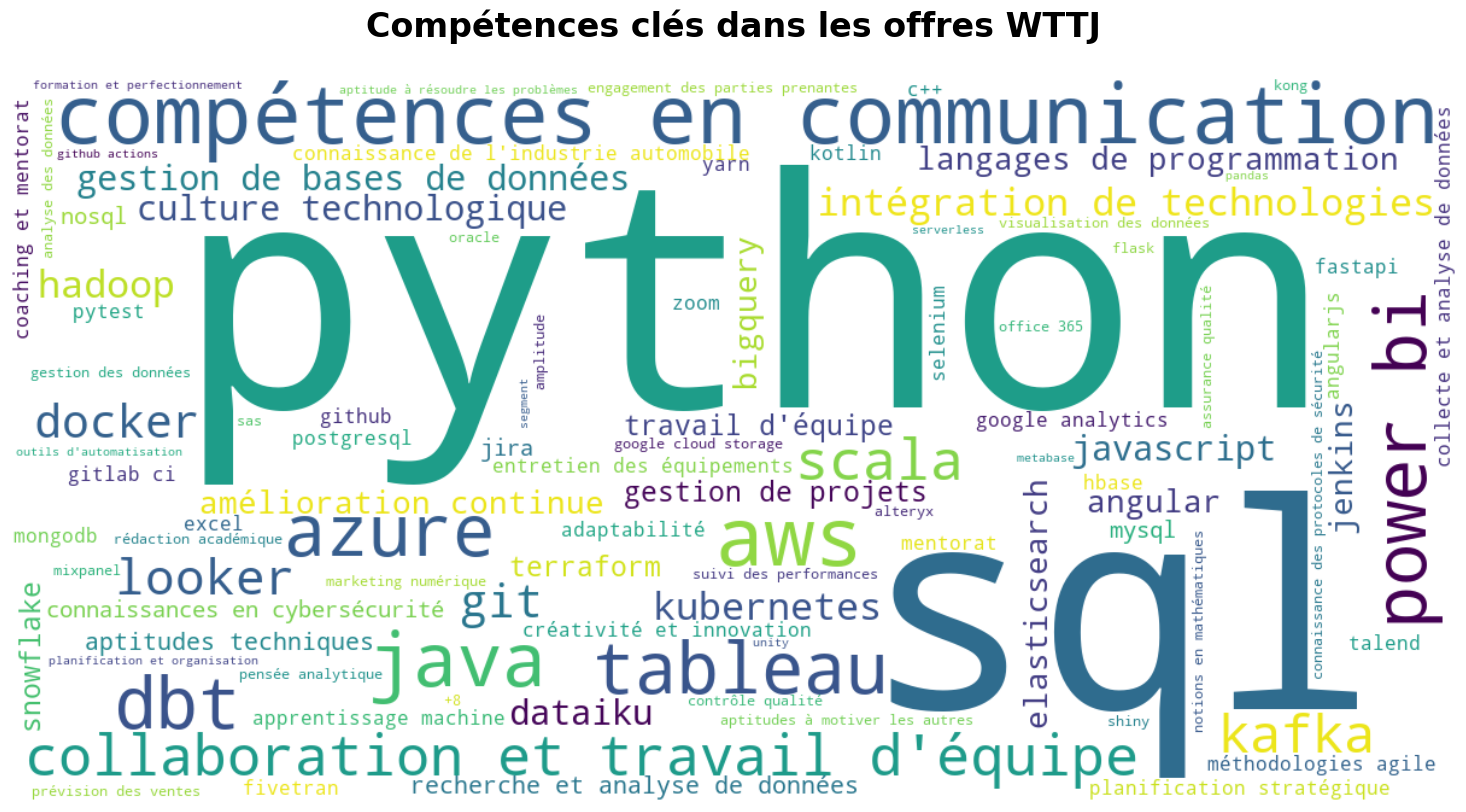

In [9]:
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate_from_frequencies(competence_counts)

# Affichage
fig, ax = plt.subplots(figsize=(16, 9))

plt.title("Compétences clés dans les offres WTTJ", fontsize=24, weight='bold', loc='center', pad=30)

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

plt.tight_layout(pad=3)
plt.subplots_adjust(top=0.85)

plt.show()

wordcloud.to_file("img/Compétences clés Data 2025 WTTJ.png")